# Clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

## Import the dataframes

In [7]:
spotify_df = pd.read_csv('./spotify_df.csv', index_col='Unnamed: 0')
music_df = pd.read_csv('./music_df.csv', index_col='Unnamed: 0')

In [8]:
spotify_df.head()

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,John Lennon,Imagine - Remastered 2010,0.547,0.257,0,-12.358,1,0.0252,0.907,0.1830,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4
1,Procol Harum,A Whiter Shade Of Pale,0.249,0.660,0,-6.905,1,0.0342,0.504,0.0026,0.0891,0.435,149.813,audio_features,3qitymULqEibr7yknRMKU4,spotify:track:3qitymULqEibr7yknRMKU4,https://api.spotify.com/v1/tracks/3qitymULqEib...,https://api.spotify.com/v1/audio-analysis/3qit...,248947,4
2,Queen,Bohemian Rhapsody - Remastered 2011,0.414,0.404,0,-9.928,0,0.0499,0.271,0.0000,0.3000,0.224,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320,4
3,Pink Floyd,Comfortably Numb - 2011 Remastered Version,0.472,0.366,11,-12.595,0,0.0286,0.150,0.3080,0.0837,0.171,127.167,audio_features,082cLCIXNPg2ruTrENz4Vt,spotify:track:082cLCIXNPg2ruTrENz4Vt,https://api.spotify.com/v1/tracks/082cLCIXNPg2...,https://api.spotify.com/v1/audio-analysis/082c...,382297,4
4,Bob Dylan,Knockin' On Heaven's Door,0.513,0.396,7,-13.061,1,0.0299,0.251,0.1770,0.1100,0.229,140.208,audio_features,6HSXNV0b4M4cLJ7ljgVVeh,spotify:track:6HSXNV0b4M4cLJ7ljgVVeh,https://api.spotify.com/v1/tracks/6HSXNV0b4M4c...,https://api.spotify.com/v1/audio-analysis/6HSX...,149880,4


In [9]:
music_df.head()

,artist,song
0,Mark Ronson featuring Bruno Mars,Uptown Funk
1,Ed Sheeran,Thinking Out Loud
2,Wiz Khalifa featuring Charlie Puth,See You Again
3,Fetty Wap,Trap Queen
4,Maroon 5,Sugar


## Feature selection and scaling

In [6]:
spotify_df.columns

Index(['artist', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [149]:
X= spotify_df[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.547,0.257,0,-12.358,1,0.0252,0.9070,0.183000,0.0935,0.169,75.752
1,0.249,0.660,0,-6.905,1,0.0342,0.5040,0.002600,0.0891,0.435,149.813
2,0.414,0.404,0,-9.928,0,0.0499,0.2710,0.000000,0.3000,0.224,71.105
3,0.472,0.366,11,-12.595,0,0.0286,0.1500,0.308000,0.0837,0.171,127.167
4,0.513,0.396,7,-13.061,1,0.0299,0.2510,0.177000,0.1100,0.229,140.208
...,...,...,...,...,...,...,...,...,...,...,...
304,0.518,0.565,4,-9.002,0,0.0473,0.1920,0.000000,0.1250,0.429,84.808
305,0.450,0.417,8,-8.955,1,0.0380,0.0276,0.000002,0.0534,0.226,141.492
306,0.672,0.161,11,-21.340,1,0.0314,0.6980,0.000038,0.1340,0.143,109.649
307,0.685,0.394,2,-11.740,1,0.0322,0.3440,0.000000,0.2620,0.194,129.972


In [150]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [151]:
# from sklearn.preprocessing import MinMaxScaler

# transformer = MinMaxScaler().fit(X_train)
# X_train_normalized = transformer.transform(X_train)
# X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train.columns)
# X_train_norm.head()

In [152]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
#transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)
X_norm = pd.DataFrame(X_normalized, columns=X.columns)
X_norm.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.050029,-1.360599,-1.453865,-0.705532,0.755407,-0.680955,1.833495,0.237595,-0.613461,-1.089480,-1.536741
1,-1.629524,0.241158,-1.453865,0.364252,0.755407,-0.586728,0.594122,-0.413514,-0.641221,-0.085673,1.032761
2,-0.754971,-0.776335,-1.453865,-0.228808,-1.323791,-0.422354,-0.122439,-0.422898,0.689368,-0.881926,-1.697965
3,-0.447553,-0.927369,1.614137,-0.752028,-1.323791,-0.645358,-0.494559,0.688751,-0.675290,-1.081933,0.247071
4,-0.230240,-0.808132,0.498500,-0.843449,0.755407,-0.631747,-0.183947,0.215940,-0.509361,-0.863058,0.699521


## Choosing the k

In [153]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

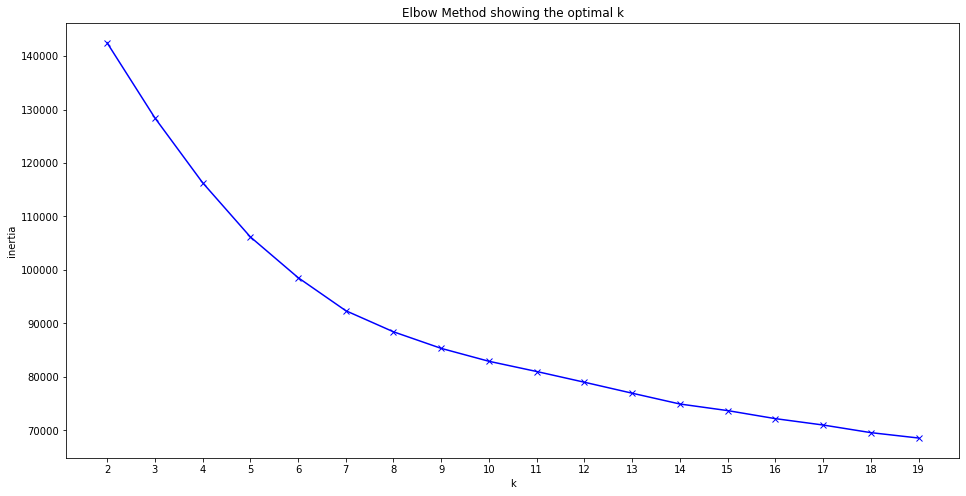

In [154]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_norm)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k') 


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

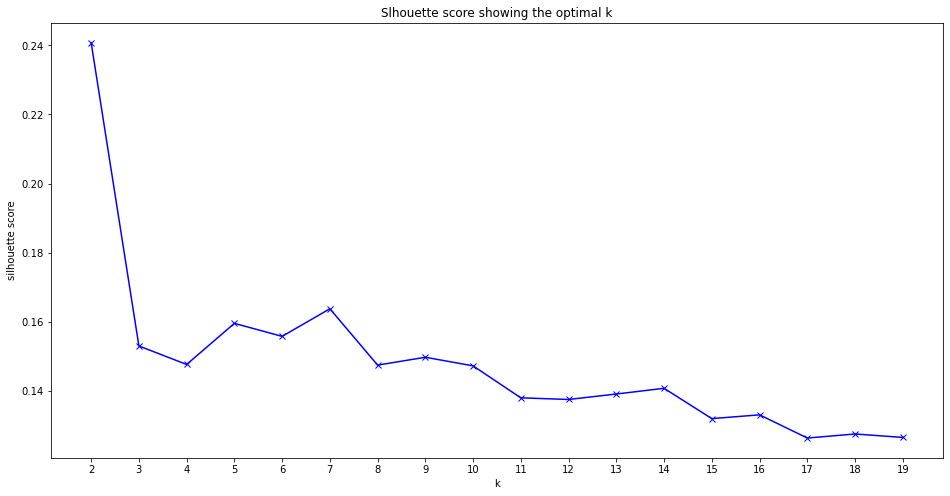

In [155]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_norm)
    silhouette.append(silhouette_score(X_norm, kmeans.predict(X_norm)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [156]:
# Ideally we decide on the number of clusters looking at where the first graph makes an elbow &
# where the silhouette graph gives the max!

# For our project here (the song recommendation project), I will need to deviate from these rules of thumb a bit. 

# n=6 is more suitable for our purpose. 


## Applying the KMeans

In [172]:
kmeans = KMeans(n_clusters=7) #, random_state=1234
kmeans.fit(X_norm)

KMeans(n_clusters=7)

In [173]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_norm)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    4530
1     819
2    2844
3    1314
4    1411
5    2268
6    3012
dtype: int64

In [174]:
kmeans.inertia_ 

92368.0940244784

In [175]:
clusters

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [176]:
spotify_model_df = spotify_df.copy()
spotify_model_df['cluster'] = clusters

In [186]:
spotify_model_df.head(30) 

# the spotify df now includes a column called 'cluster' which shows for each song which
# cluster they belong to

,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,John Lennon,Imagine - Remastered 2010,0.547,0.257,0,-12.358,1,0.0252,0.907000,0.183000,...,0.1690,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4,2
1,Procol Harum,A Whiter Shade Of Pale,0.249,0.660,0,-6.905,1,0.0342,0.504000,0.002600,...,0.4350,149.813,audio_features,3qitymULqEibr7yknRMKU4,spotify:track:3qitymULqEibr7yknRMKU4,https://api.spotify.com/v1/tracks/3qitymULqEib...,https://api.spotify.com/v1/audio-analysis/3qit...,248947,4,2
2,Queen,Bohemian Rhapsody - Remastered 2011,0.414,0.404,0,-9.928,0,0.0499,0.271000,0.000000,...,0.2240,71.105,audio_features,1AhDOtG9vPSOmsWgNW0BEY,spotify:track:1AhDOtG9vPSOmsWgNW0BEY,https://api.spotify.com/v1/tracks/1AhDOtG9vPSO...,https://api.spotify.com/v1/audio-analysis/1AhD...,354320,4,2
3,Pink Floyd,Comfortably Numb - 2011 Remastered Version,0.472,0.366,11,-12.595,0,0.0286,0.150000,0.308000,...,0.1710,127.167,audio_features,082cLCIXNPg2ruTrENz4Vt,spotify:track:082cLCIXNPg2ruTrENz4Vt,https://api.spotify.com/v1/tracks/082cLCIXNPg2...,https://api.spotify.com/v1/audio-analysis/082c...,382297,4,6
4,Bob Dylan,Knockin' On Heaven's Door,0.513,0.396,7,-13.061,1,0.0299,0.251000,0.177000,...,0.2290,140.208,audio_features,6HSXNV0b4M4cLJ7ljgVVeh,spotify:track:6HSXNV0b4M4cLJ7ljgVVeh,https://api.spotify.com/v1/tracks/6HSXNV0b4M4c...,https://api.spotify.com/v1/audio-analysis/6HSX...,149880,4,2
5,The Yesterdays,Yesterday,0.340,0.263,5,-7.986,1,0.0273,0.177000,0.000000,...,0.2860,91.908,audio_features,3M9UNyYTjbGpLnf02QSgMy,spotify:track:3M9UNyYTjbGpLnf02QSgMy,https://api.spotify.com/v1/tracks/3M9UNyYTjbGp...,https://api.spotify.com/v1/audio-analysis/3M9U...,123832,4,2
6,Eagles,Hotel California - 2013 Remaster,0.579,0.508,2,-9.484,1,0.0270,0.005740,0.000494,...,0.6090,147.125,audio_features,40riOy7x9W7GXjyGp4pjAv,spotify:track:40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4,0
7,Simon & Garfunkel,The Sound of Silence,0.435,0.456,6,-10.305,1,0.0279,0.136000,0.000002,...,0.5290,107.529,audio_features,2LkaNhCrNVmcYgXJeLVmsw,spotify:track:2LkaNhCrNVmcYgXJeLVmsw,https://api.spotify.com/v1/tracks/2LkaNhCrNVmc...,https://api.spotify.com/v1/audio-analysis/2Lka...,185440,4,0
8,Ben E. King,Stand by Me,0.650,0.306,9,-9.443,1,0.0393,0.570000,0.000007,...,0.6050,118.068,audio_features,3SdTKo2uVsxFblQjpScoHy,spotify:track:3SdTKo2uVsxFblQjpScoHy,https://api.spotify.com/v1/tracks/3SdTKo2uVsxF...,https://api.spotify.com/v1/audio-analysis/3SdT...,180056,4,2
9,Pink Floyd,Echoes - 2011 Remastered Version,0.254,0.296,6,-17.920,0,0.0426,0.428000,0.574000,...,0.1390,146.950,audio_features,1Mzm1CNqVxtwbCYhOo843s,spotify:track:1Mzm1CNqVxtwbCYhOo843s,https://api.spotify.com/v1/tracks/1Mzm1CNqVxtw...,https://api.spotify.com/v1/audio-analysis/1Mzm...,1413307,4,3


# Song recommendation

## Search for the audio features of the input

In [194]:
results = sp.search(q='Umbrella', limit=1)

In [ ]:
results

In [165]:
results.keys()

dict_keys(['tracks'])

In [166]:
results['tracks']['items'][0]['uri'] # this is the one that I'll use in the function below!


'spotify:track:49FYlytm3dAAraYgpoJZux'

## Actually recommending!

I will ask the user to input their favorite song. If their favorite song is among the top 200 songs, I will recommend a song from the top 200 songs. If the song is not in the top 200 songs dataframe,
I will search for the song on spotify and retrieve its audio features. The song will be placed into 
a clustor based on its audio features. Then I will recommend user a song from the same cluster as the song that they input at the beginning. Below are the functions that I wrote for this recommender system!

In [179]:
def song_magician(song_name):
    
    output = sp.search(q=song_name, limit=1)

    song_uri_s=[]
    features_s= []

    song_uri_s.append(output['tracks']['items'][0]['uri'])
    features_s.append(sp.audio_features(song_uri_s))
        
    df_v0= pd.DataFrame({"audio_features":features_s})
    
    nested_columns = ['audio_features']
    df_v1 = flatten_it(df_v0, nested_columns)
    X_favoritesong_df= pd.concat([df_v1.drop(['audio_features_0'], axis=1), df_v1['audio_features_0'].apply(pd.Series)], axis=1)
    X_favoritesong_df = X_favoritesong_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 
                                           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
    X_favsong_normalized = transformer.transform(X_favoritesong_df)
    X_favsong_norm = pd.DataFrame(X_favsong_normalized, columns=X_favoritesong_df.columns)
    cluster_no = kmeans.predict(X_favsong_norm)

    return cluster_no


In [180]:
favorite_song = input("One of my favorite songs is: ")

One of my favorite songs is: Garganta Con Arena


In [181]:
if len(music_df[(music_df['song'].isin([favorite_song]))])>0:
    random_hot_song= music_df['song'].sample().item()
    artist_hot= music_df.loc[music_df['song'] == random_hot_song, 'artist'].item()
    
    print("Our song recommendation is: ", random_hot_song,'by', artist_hot)
else:
    cluster=song_magician(favorite_song)
    dummy_df= spotify_model_df[spotify_model_df['cluster']==cluster[0]]
    random_song =dummy_df['song'].sample().item()
    artist= dummy_df.loc[dummy_df['song'] == random_song, 'artist'].item()
    print("Our song recommendation is: ", random_song, 'by', artist)

Our song recommendation is:  Honey by Kehlani


## The function

In [182]:
def coolest_song_recommender_out_there():
    favorite_song = input("One of my favorite songs is: ")
    if len(music_df[(music_df['song'].isin([favorite_song]))])>0:
        random_hot_song= music_df['song'].sample().item()
        artist_hot= music_df.loc[music_df['song'] == random_hot_song, 'artist'].item()
        print("Our song recommendation is: ", random_hot_song,'by', artist_hot)
        
    else:
        cluster=song_magician(favorite_song) #we are using our magician function here!
        dummy_df= spotify_model_df[spotify_model_df['cluster']==cluster[0]]
        random_song =dummy_df['song'].sample().item()
        artist= dummy_df.loc[dummy_df['song'] == random_song, 'artist'].item()
        print("Our song recommendation is: ", random_song, 'by', artist)

In [241]:
coolest_song_recommender_out_there() #simply run this function and enjoy some great recommendations!

One of my favorite songs is: the dessert babbler
Our song recommendation is:  I've Just Lost Somebody by Golden Earring
